# SF Salaries Exercise - Solutions

Welcome to a quick exercise for you to practice your pandas skills! We will be using the [SF Salaries Dataset](https://www.kaggle.com/kaggle/sf-salaries) from Kaggle! Just follow along and complete the tasks outlined in bold below. The tasks will get harder and harder as you go along.

**Import pandas as pd.**

In [1]:
import pandas as pd

**Read Salaries.csv as a dataframe called sal.**

In [2]:
sal=pd.read_csv('Salaries.csv')

C:\Users\mohamed\AppData\Local\Temp\ipykernel_22484\84743563.py:1: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  sal=pd.read_csv('Salaries.csv')


**Check the head of the DataFrame.**

In [3]:
sal.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


**Use the .info() method to find out how many entries there are.**

In [4]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [5]:
sal.shape

(148654, 13)

In [6]:
list(sal.query("BasePay=='Not Provided'").index)

[148646, 148650, 148651, 148652]

**Use the .describe() method to get some statistics for the data**

In [7]:
sal.describe()

,Id,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,567595.430000,567595.430000,2014.000000,NaN


**What is the average BasePay ?**

In [8]:
sal=sal.drop(list(sal.query("BasePay=='Not Provided'").index),axis=0)

In [9]:
sal['BasePay']=sal['BasePay'].astype(float)

In [10]:
sal['BasePay'].mean()

66325.44884050643

**What is the highest amount of OvertimePay in the dataset ?**

In [11]:
sal['OvertimePay'].unique()

array([0.0, 245131.88, 106088.18, ..., '228.00', '102.70', '56.77'],
      dtype=object)

In [12]:
sal['OvertimePay']=sal['OvertimePay'].astype(float)

In [13]:
sal['OvertimePay'].nlargest(10)

1         245131.88
36159     220909.48
72964     196689.18
36163     192424.49
110574    173547.73
110577    173178.23
110583    169659.92
72943     163477.81
36199     160418.47
73021     156077.49
Name: OvertimePay, dtype: float64

In [14]:
sal['OvertimePay'].max()

245131.88

**What is the job title of  JOSEPH DRISCOLL ? Note: Use all caps, otherwise you may get an answer that doesn't match up (there is also a lowercase Joseph Driscoll).**

In [15]:
'JOSEPH DRISCOLL'  in sal['EmployeeName'].unique()

True

In [16]:
sal.query("EmployeeName=='JOSEPH DRISCOLL'")['JobTitle'].values[0]

'CAPTAIN, FIRE SUPPRESSION'

**How much does JOSEPH DRISCOLL make (including benefits)?**

In [17]:
sal.query("EmployeeName=='JOSEPH DRISCOLL'")['TotalPayBenefits'].values[0]

270324.91

**What is the name of highest paid person (including benefits)?**

In [18]:
sal[sal['TotalPayBenefits']==sal['TotalPayBenefits'].max()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN


In [19]:
sal[sal['TotalPayBenefits']==sal['TotalPayBenefits'].max()]['EmployeeName']

0    NATHANIEL FORD
Name: EmployeeName, dtype: object

**What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?**

In [20]:
sal[sal['TotalPayBenefits']==sal['TotalPayBenefits'].min()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.00,-618.13,-618.13,2014,NaN,San Francisco,PT


In [21]:
sal[sal['TotalPayBenefits']==sal['TotalPayBenefits'].min()]['EmployeeName']

148653    Joe Lopez
Name: EmployeeName, dtype: object

**What was the average (mean) BasePay of all employees per year? (2011-2014) ?**

In [22]:
sal.groupby('Year').mean()['BasePay']

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

**How many unique job titles are there?**

In [23]:
len(sal['JobTitle'].unique())

2158

**What are the top 5 most common jobs?**

In [24]:
sal['JobTitle'].value_counts().nlargest(5)

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

**How many Job Titles were represented by only one person in 2013? (e.g. Job Titles with only one occurence in 2013?)**

In [25]:
(sal[sal['Year']==2013]['JobTitle'].value_counts()==1).sum()

202

**How many people have the word Chief in their job title? (This is pretty tricky)**

In [26]:
chief_list=[]

for job in sal['JobTitle'].values:
    if 'Chief' in job or 'chief' in job:
        chief_list.append(job)
len(chief_list)        

423

In [32]:
length=[]
for i in sal['JobTitle']:
    length.append(len(i))

In [33]:
length

[46,
 31,
 31,
 36,
 44,
 25,
 34,
 30,
 34,
 38,
 48,
 31,
 27,
 17,
 34,
 34,
 17,
 37,
 34,
 26,
 26,
 26,
 25,
 34,
 25,
 15,
 25,
 34,
 36,
 44,
 27,
 36,
 17,
 34,
 34,
 33,
 34,
 34,
 34,
 34,
 34,
 34,
 44,
 11,
 30,
 5,
 34,
 17,
 36,
 27,
 34,
 17,
 25,
 25,
 37,
 36,
 17,
 25,
 27,
 11,
 27,
 31,
 37,
 34,
 34,
 31,
 48,
 25,
 36,
 27,
 17,
 34,
 49,
 13,
 34,
 34,
 34,
 50,
 25,
 34,
 27,
 27,
 34,
 46,
 37,
 22,
 34,
 11,
 18,
 50,
 34,
 31,
 25,
 31,
 34,
 12,
 11,
 34,
 22,
 48,
 34,
 27,
 11,
 18,
 11,
 11,
 34,
 18,
 18,
 11,
 11,
 18,
 48,
 18,
 18,
 20,
 17,
 32,
 34,
 18,
 25,
 11,
 22,
 18,
 18,
 31,
 11,
 34,
 25,
 27,
 50,
 25,
 18,
 34,
 34,
 27,
 21,
 17,
 49,
 49,
 49,
 27,
 32,
 11,
 34,
 37,
 18,
 11,
 27,
 18,
 11,
 34,
 34,
 37,
 14,
 34,
 32,
 34,
 34,
 48,
 18,
 22,
 12,
 32,
 22,
 11,
 18,
 11,
 13,
 34,
 27,
 32,
 25,
 27,
 34,
 27,
 27,
 12,
 22,
 13,
 34,
 29,
 12,
 11,
 34,
 12,
 30,
 50,
 18,
 27,
 32,
 30,
 34,
 25,
 27,
 11,
 35,
 50,
 11,
 11,
 

**Bonus: Is there a correlation between length of the Job Title string and Salary?**

In [27]:
import matplotlib.pyplot as plt


In [28]:
plt.style.use('ggplot')

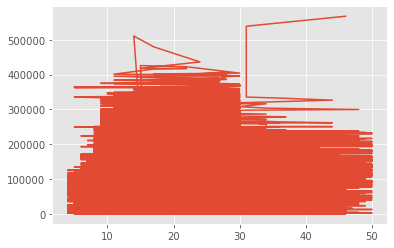

In [34]:
plt.plot(length,sal['TotalPayBenefits'])

# Great Job!